In [ ]:
# Log Return

# CAGR
# Sharp ratio
# Maxdraw down

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr

In [144]:
import plotly.express as px
import plotly.graph_objects as go

In [159]:
def get_returns_df(df, N=1, log=False):
    if log:
        return np.log(df/df.shift(N).iloc[N-1:]).fillna(0)
    else:
        return df.pct_change(N, fill_method=None).iloc[N-1:].fillna(0)
    
def get_cum_returns_df(return_df, log=False):
    if log:
        return np.exp(return_df.cumsum())
    else:
        return (1 + return_df).cumprod()

In [ ]:
def get_annualized_returns_series(log_return_df, num_day_in_year=250):
    return (log_return_df.mean() * num_day_in_year).round(2)

def get_annualized_std_series(log_return_df, num_day_in_year=250):
    return (log_return_df.std() * (num_day_in_year ** 0.5)).round(2)

In [146]:
def get_cagr_series(cum_rtn_df, num_day_in_year=250):
    cagr_series = cum_rtn_df.iloc[-1] ** (num_day_in_year/len(cum_rtn_df))
    return cagr_series

In [147]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr

In [73]:
df1 = fdr.DataReader('005930', '2018-01-02', '2018-10-30')
df2 = fdr.DataReader('069500', '2018-01-02', '2018-10-30')

In [74]:
df = pd.concat([df1['Close'], df2['Close']], axis=1)
df.head()

,Close,Close
Date,,
2018-01-02,51020,29836
2018-01-03,51620,29964
2018-01-04,51080,29727
2018-01-05,52120,30131
2018-01-08,52020,30333


In [75]:
df.columns = ['상성전자', 'kodex200']

In [76]:
# simple return
simple_rtn_df = df.pct_change(1).fillna(0)

In [77]:
# log return

log_rtn_df = np.log(df / df.shift(1)).fillna(0)
log_rtn_df

,상성전자,kodex200
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.011691,0.004281
2018-01-04,-0.010516,-0.007941
2018-01-05,0.020156,0.013499
2018-01-08,-0.001920,0.006682
...,...,...
2018-10-24,-0.011682,-0.005166
2018-10-25,-0.037108,-0.016105
2018-10-26,0.000000,-0.015998


C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 miss

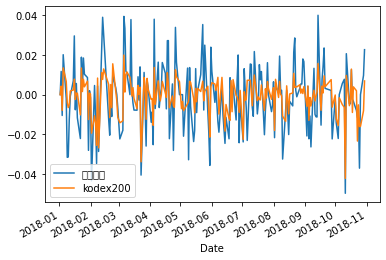

In [30]:
log_rtn_df.plot()
plt.show()

<AxesSubplot:ylabel='Frequency'>

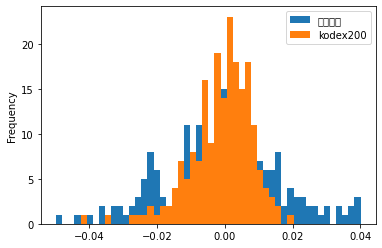

In [34]:
log_rtn_df.plot(kind='hist', bins=50)

In [ ]:
# 누적수익률 

In [38]:
(simple_rtn_df + 1).cumprod()

,상성전자,kodex200
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.011760,1.004290
2018-01-04,1.001176,0.996347
2018-01-05,1.021560,1.009887
2018-01-08,1.019600,1.016658
...,...,...
2018-10-24,0.833987,0.841266
2018-10-25,0.803606,0.827825
2018-10-26,0.803606,0.814687


In [42]:
log_rtn_df.cumsum()
cum_rtn_df = np.exp(log_rtn_df.cumsum())

## Log Return

In [78]:
def get_annualized_returns_series(log_return_df, num_day_in_year = 250):
    return (log_return_df.mean() * num_day_in_year).round(2)

def get_annualized_std_series(log_returns_df, num_day_in_year = 250):
    return (log_returns_df.std() * (num_day_in_year ** 0.5)).round(2)

In [79]:
get_annualized_returns_series(log_rtn_df, num_day_in_year=250)

상성전자       -0.23
kodex200   -0.26
dtype: float64

In [80]:
get_annualized_std_series(log_rtn_df, num_day_in_year=250)

상성전자        0.27
kodex200    0.14
dtype: float64

## CAGR (연환산 복리 수익률)

In [44]:
cum_rtn_df.iloc[-1] # 10개월 누적 복리수익율

상성전자        0.830067
kodex200    0.813715
Name: 2018-10-30 00:00:00, dtype: float64

In [45]:
num_day_in_year = 252

cum_rtn_df.iloc[-1] ** (252/ len(cum_rtn_df))

상성전자        0.792668
kodex200    0.773236
Name: 2018-10-30 00:00:00, dtype: float64

In [50]:
# 연 평균 복리 수악율

def get_cagr_series(cum_rtn_df, num_day_in_year = 250):
    cagr_series = cum_rtn_df.iloc[-1] ** (num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [51]:
get_cagr_series(cum_rtn_df, num_day_in_year = 250)

상성전자        0.794131
kodex200    0.774816
Name: 2018-10-30 00:00:00, dtype: float64

In [56]:
temp_df = fdr.DataReader('069500', '2019-01-02', '2020-10-30')

In [59]:
log_rtn_df = np.log(temp_df.pct_change() + 1).fillna(0)
log_rtn_df = log_rtn_df['Close']
cum_rtn_df = np.exp(log_rtn_df.cumsum())
get_cagr_series(cum_rtn_df, num_day_in_year = 250)

1.10478620660929

## sharp ratio

In [81]:
# sharp ratio = 수익율 / 변동성

In [83]:
yearly_rfr = 0.025
excess_rtns = log_rtn_df.mean() * 252 - yearly_rfr
excess_rtns / (log_rtn_df.std() * np.sqrt(252))

상성전자       -0.937691
kodex200   -1.950080
dtype: float64

In [84]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / (log_rtn_df.std() * np.sqer(252))

## Drawdown

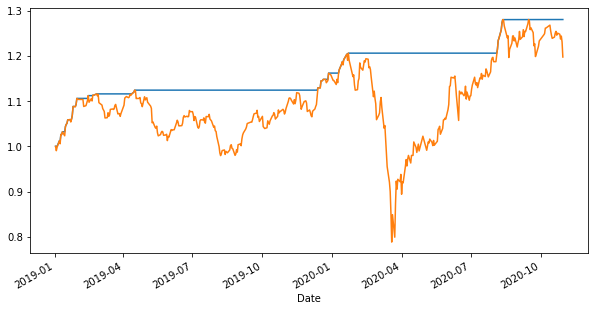

In [88]:
cummax_df = cum_rtn_df.cummax()

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

plt.show()

In [93]:
drawdown_df = cum_rtn_df / cummax_df - 1

<AxesSubplot:xlabel='Date'>

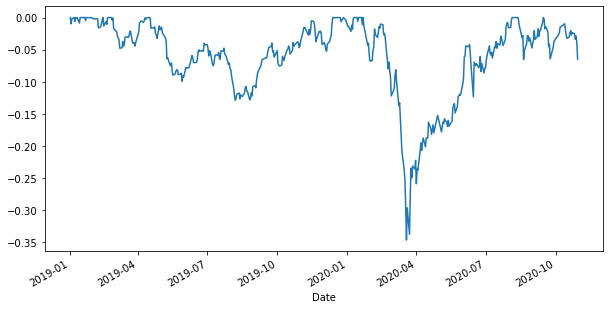

In [95]:
drawdown_df.plot(figsize=(10,5))

In [ ]:
# 1. MDD (max draw down)

In [96]:
mdd = drawdown_df.min()
mdd

-0.34642576590730545

In [97]:
# 2. longest dd period

In [98]:
max_point_df = drawdown_df[drawdown_df == 0]
max_point_df

Date
2019-01-02    0.0
2019-01-07    0.0
2019-01-09    0.0
2019-01-11    0.0
2019-01-15    0.0
2019-01-16    0.0
2019-01-17    0.0
2019-01-18    0.0
2019-01-21    0.0
2019-01-23    0.0
2019-01-24    0.0
2019-01-25    0.0
2019-01-29    0.0
2019-01-30    0.0
2019-02-14    0.0
2019-02-20    0.0
2019-02-21    0.0
2019-02-22    0.0
2019-02-25    0.0
2019-04-15    0.0
2019-04-16    0.0
2019-12-13    0.0
2019-12-17    0.0
2019-12-19    0.0
2019-12-20    0.0
2019-12-27    0.0
2020-01-10    0.0
2020-01-13    0.0
2020-01-14    0.0
2020-01-16    0.0
2020-01-17    0.0
2020-01-20    0.0
2020-01-22    0.0
2020-08-05    0.0
2020-08-06    0.0
2020-08-07    0.0
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-09-15    0.0
Name: Close, dtype: float64

In [102]:
first_df = max_point_df.index[:-1]
second_df = max_point_df.index[]

DatetimeIndex(['2019-01-02', '2019-01-07', '2019-01-09', '2019-01-11',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-21', '2019-01-23', '2019-01-24', '2019-01-25',
               '2019-01-29', '2019-01-30', '2019-02-14', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-25', '2019-04-15',
               '2019-04-16', '2019-12-13', '2019-12-17', '2019-12-19',
               '2019-12-20', '2019-12-27', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-16', '2020-01-17', '2020-01-20',
               '2020-01-22', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-10', '2020-08-11', '2020-08-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
max_point_df.index[]

In [103]:
ldd_st = first_df[period.argmin()]
ldd_emd = second_df[period.argmin()]

NameError: name 'first_df' is not defined

In [104]:
print(ldd_st, ldd_ed)

NameError: name 'ldd_st' is not defined

In [108]:
def get_drawdown_infos(cum_returns_df):
    cummax_df = cum_rtn_df.cummax()
    dd_df = cum_returns_df / cummax_df - 1
    
    mdd_series = dd_df.min()
    
    max_point_df = dd_df[dd_df == 0]
    
    first_df = max_point_df.index[:-1]
    second_df = max_point_df.index[1:]
    
    period = first_df - second_df
    
    longest_dd_period = period.min().days
    
    ldd_st = first_df[period.argmin()]
    ldd_ed = second_df[period.argmin()]
    
    return mdd_series, longest_dd_period, ldd_st, ldd_ed

In [109]:
mdd, longest_dd, longest_dd_st, longest_dd_ed = get_drawdown_infos(cum_rtn_df)

In [113]:
print('최대 하락률 :', mdd)
print('최대 하락기간 :', longest_dd)
print('최대 하락기간 시작 날짜 :', longest_dd_st)
print('최대 하락기간 끝 날짜 :',longest_dd_ed)

최대 하락률 : -0.34642576590730545
최대 하락기간 : -241
최대 하락기간 시작 날짜 : 2019-04-16 00:00:00
최대 하락기간 끝 날짜 : 2019-12-13 00:00:00


## 이동 편균선 매매 전략

In [121]:
df = fdr.DataReader('005930', '2010-01-02', '2020-10-30')

In [122]:
df['sma'] = df['Close'].rolling(5).mean()
df['lma'] = df['Close'].rolling(20).mean()
df.head()

,Open,High,Low,Close,Volume,Change,sma,lma
Date,,,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516,NaN,NaN
2010-01-05,16520,16580,16300,16440,559219,0.016069,NaN,NaN
2010-01-06,16580,16820,16520,16820,459755,0.023114,NaN,NaN
2010-01-07,16820,16820,16260,16260,443237,-0.033294,NaN,NaN
2010-01-08,16400,16420,16120,16420,295798,0.009840,16424.0,NaN


In [123]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

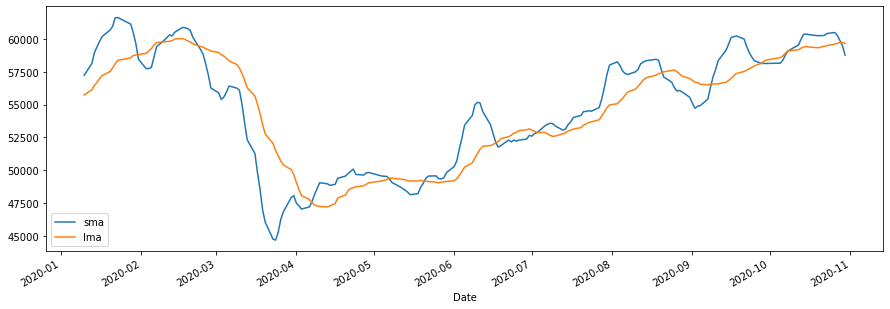

In [130]:
#df[['Close', 'sma', 'lma']].plot(figsize=(15, 5))
df[['sma', 'lma']].iloc[-200:].plot(figsize=(15,5))

In [126]:
df.head()

,Open,High,Low,Close,Volume,Change,sma,lma
Date,,,,,,,,
2010-01-29,16000,16019,15600,15680,457285,-0.029703,16196.0,16402.0
2010-02-01,15679,15700,15300,15540,501042,-0.008929,15936.0,16370.0
2010-02-02,15800,15800,15400,15440,393803,-0.006435,15764.0,16320.0
2010-02-03,15640,15700,15360,15540,330235,0.006477,15672.0,16256.0
2010-02-04,15500,15660,15440,15520,239799,-0.001287,15544.0,16219.0


In [131]:
df['position'] = np.where(df['sma'] >= df['lma'], 1, 0)

<AxesSubplot:xlabel='Date'>

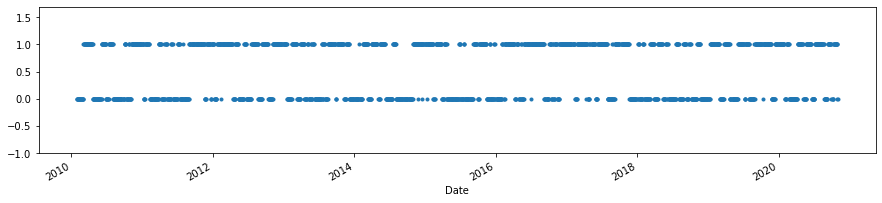

In [135]:
df['position'].plot(marker='.', linestyle='none', figsize=(15, 3), ylim=[-1.01, 1.7])

In [137]:
long_index = df[df['position'] - df['position'].shift(1) == 1].index
exit_index = df[df['position'] - df['position'].shift(1) == -1].index

<AxesSubplot:xlabel='Date'>

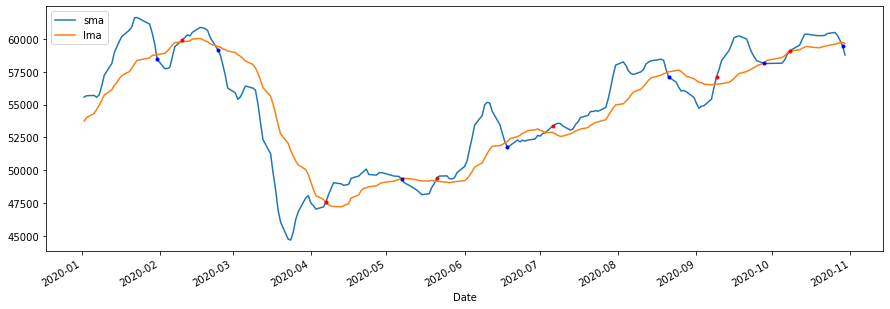

In [143]:
df[['sma', 'lma']].loc['2020-01-01':].plot(figsize=(15, 5))
df.loc[long_index, 'sma'].loc['2020-01-01':].plot(marker='o', color='red', linestyle='none', markersize=3)
df.loc[exit_index, 'sma'].loc['2020-01-01':].plot(marker='o', color='blue', linestyle='none', markersize=3)

In [154]:
df.loc[:, 'rtn'] = get_returns_df(df['Close'], N=1, log=True)

In [155]:
df.loc[:, 'str_rtn'] = (df['position'].shift(1) * df['rtn']).fillna(0)

In [160]:
df.loc[:, 'cum_str_rtn'] = get_cum_returns_df(df['str_rtn'], log=True)

In [165]:
cagr = get_cagr_series(df['cum_str_rtn'], num_day_in_year=250)
sharp_ratio = get_sharpe_ratio(df['str_rtn'], yearly_rfr=0.025)
mdd, ldd_period, ldd_st, ldd_ed = get_drawdown_infos(df['cum_str_rtn'])

ValueError: attempt to get argmin of an empty sequence

In [167]:
print('cagr :', cagr)
print('sharp_ratio :', sharp_ratio)
print('Max_drawdown :', mdd_series)
print('Longest_dd_period :', ldd_period)
print('Longest_dd_st_date :', ldd_st)
print('Longest_dd_ed_date :', ldd_ed)

cagr : 1.025080520098154
sharp_ratio : None


NameError: name 'mdd_series' is not defined

<AxesSubplot:xlabel='Date'>

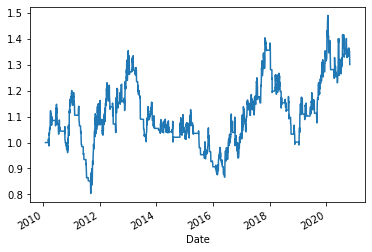

In [170]:
df.loc[:, 'cum_str_rtn'].plot()

In [171]:
# Momentum

In [172]:
df = fdr.DataReader('005930', '2018-01-02', '2022-04-29')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017


In [176]:
momentum_window = 20 * 3 

In [179]:
get_returns_df(df['Close'], N=momentum_window)

Date
2018-03-29    0.000000
2018-03-30   -0.035280
2018-04-02   -0.059667
2018-04-03   -0.057948
2018-04-04   -0.099770
                ...   
2022-04-22   -0.113757
2022-04-25   -0.117177
2022-04-26   -0.106757
2022-04-27   -0.113233
2022-04-28   -0.091164
Name: Close, Length: 1006, dtype: float64

In [178]:
np.sign(get_returns_df(df['Close'], N=momentum_window))

Date
2018-03-29    0.0
2018-03-30   -1.0
2018-04-02   -1.0
2018-04-03   -1.0
2018-04-04   -1.0
             ... 
2022-04-22   -1.0
2022-04-25   -1.0
2022-04-26   -1.0
2022-04-27   -1.0
2022-04-28   -1.0
Name: Close, Length: 1006, dtype: float64

In [180]:
df.loc[:, 'position'] = position

NameError: name 'position' is not defined

In [181]:
df.dropna(inplace=True)

In [182]:
long_index = df[(df['position'] - df['position'].shift(1)) == 1].index
exit_index = df[(df['position'] - df['position'].shift(1)) == -1].index

KeyError: 'position'

In [ ]:
ax = 

In [183]:
df.loc[:, 'cum_str_rtn'].plot(figsize=(15, 5))

KeyError: 'cum_str_rtn'